# Import Package and Set Path

In [43]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cross_validation import train_test_split
import statsmodels.api as sm

In [3]:
#os.chdir("D:\bike")
path = r"D:\bike"

In [4]:
bike_data = pd.read_csv("day.csv")

# Data Exploring

In [5]:
# Explore Data
bike_data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
# Check Missing Values
pd.DataFrame(bike_data.isnull().sum())

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [8]:
# Data summary
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
# Data Info
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


# Data Preprocessing

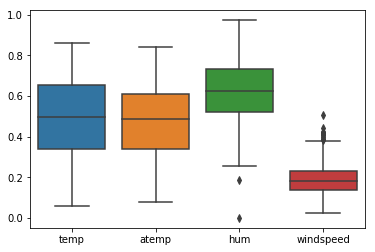

In [10]:
sns.boxplot(data=bike_data[['temp',
       'atemp', 'hum', 'windspeed']])

fig=plt.gcf()


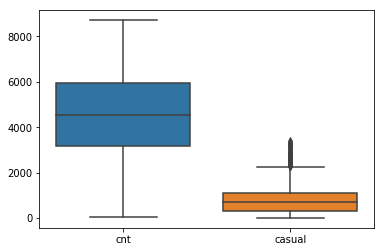

In [11]:
sns.boxplot(data=bike_data[['cnt',
       'casual']])

In [12]:
# Set for Outliers
outlier_val = ['hum', 'windspeed']
cnames = ['instant','dteday','season','yr','mnth', 'holiday','weekday','workingday','weathersit','temp'          
'atemp','hum','windspeed','casual','registered','cnt']

In [14]:
#Detect and delete outliers from data
for i in outlier_val:
    print(i)
    q75, q25 = np.percentile(bike_data.loc[:,i], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    
    bike_data = bike_data.drop(bike_data[bike_data.loc[:,i] < min].index)
    bike_data = bike_data.drop(bike_data[bike_data.loc[:,i] > max].index)

hum
0.20468725
1.0455212500000002
windspeed
-0.012431000000000025
0.380585


In [15]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 0 to 730
Data columns (total 16 columns):
instant       717 non-null int64
dteday        717 non-null object
season        717 non-null int64
yr            717 non-null int64
mnth          717 non-null int64
holiday       717 non-null int64
weekday       717 non-null int64
workingday    717 non-null int64
weathersit    717 non-null int64
temp          717 non-null float64
atemp         717 non-null float64
hum           717 non-null float64
windspeed     717 non-null float64
casual        717 non-null int64
registered    717 non-null int64
cnt           717 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 95.2+ KB


# Data Visualization

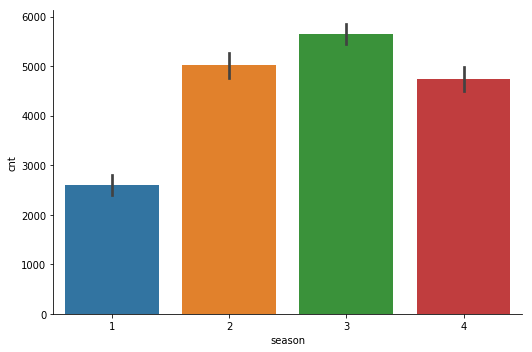

In [21]:
sns.factorplot(x="season",y="cnt",data=bike_data,kind='bar',size=5,aspect=1.5)

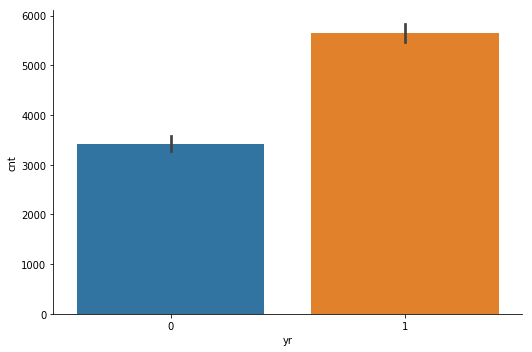

In [22]:
sns.factorplot(x="yr",y="cnt",data=bike_data,kind='bar',size=5,aspect=1.5)

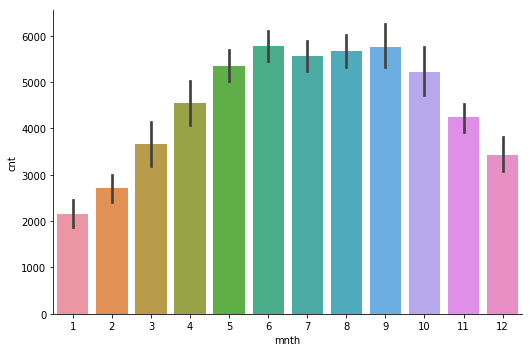

In [23]:
sns.factorplot(x="mnth",y="cnt",data=bike_data,kind='bar',size=5,aspect=1.5)

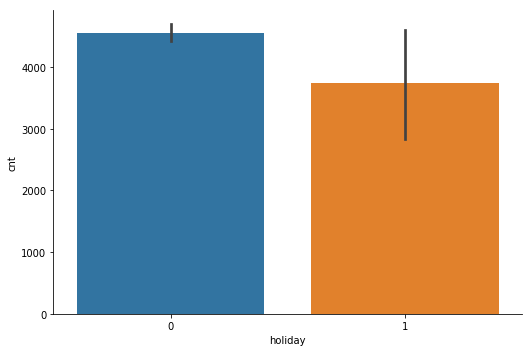

In [24]:
sns.factorplot(x="holiday",y="cnt",data=bike_data,kind='bar',size=5,aspect=1.5)

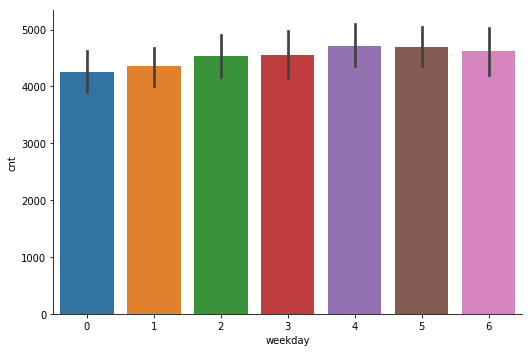

In [25]:
sns.factorplot(x="weekday",y="cnt",data=bike_data,kind='bar',size=5,aspect=1.5)

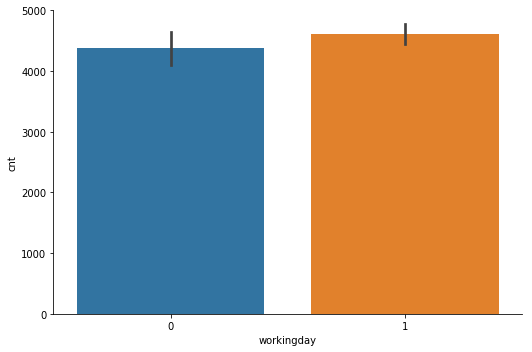

In [26]:
sns.factorplot(x="workingday",y="cnt",data=bike_data,kind='bar',size=5,aspect=1.5)

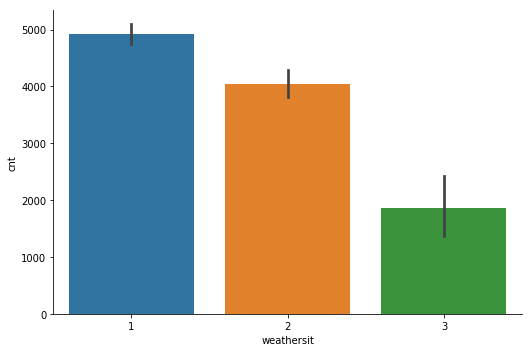

In [27]:
sns.factorplot(x="weathersit",y="cnt",data=bike_data,kind='bar',size=5,aspect=1.5)

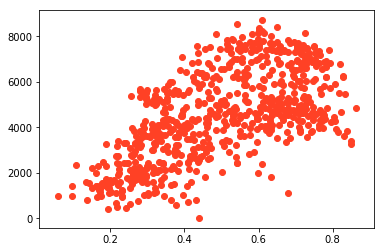

In [30]:
plt.scatter(x="temp",y="cnt",data=bike_data,color='#ff4125')

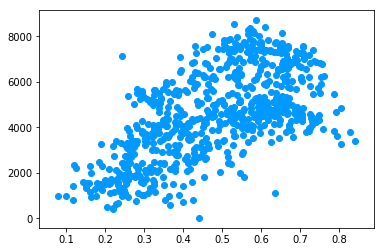

In [33]:
plt.scatter(x="atemp",y="cnt",data=bike_data,color='#0099ff')

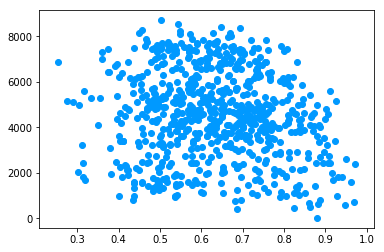

In [34]:
plt.scatter(x="hum",y="cnt",data=bike_data,color='#0099ff')

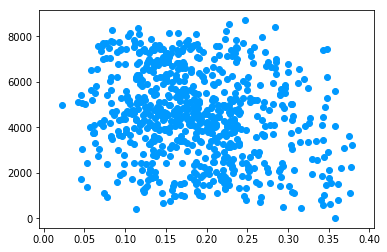

In [35]:
plt.scatter(x="windspeed",y="cnt",data=bike_data,color='#0099ff')

# Feature Engineering

(array([ 6., 27., 49., 56., 35., 64., 94., 99., 76., 51., 48., 64., 38.,
        10.]),
 array([  22.        ,  642.85714286, 1263.71428571, 1884.57142857,
        2505.42857143, 3126.28571429, 3747.14285714, 4368.        ,
        4988.85714286, 5609.71428571, 6230.57142857, 6851.42857143,
        7472.28571429, 8093.14285714, 8714.        ]),
 <a list of 14 Patch objects>)

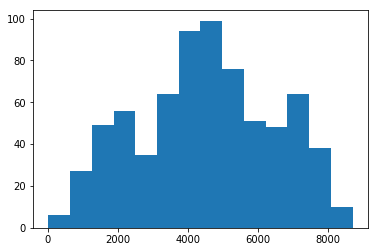

In [36]:
#hist of cnnt
%matplotlib inline  
plt.hist(bike_data['cnt'], bins='auto')

In [19]:
# Correlation Graph
df_corr = bike_data.loc[:,cnames]

C:\Users\AbhayS\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


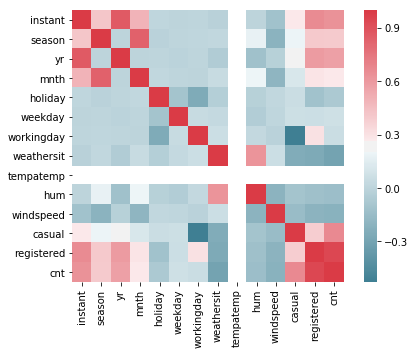

In [20]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [49]:
# Drop use less variable which can be used to predict
bike_data = bike_data.drop(['instant','dteday','atemp','casual','registered'], axis=1)

In [50]:
bike_data.head(4)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562


# Model Development

In [51]:
# Linear Regresssion
train, test = train_test_split(bike_data, test_size=0.2)

In [58]:
model = sm.OLS(bike_data.iloc[:,10], bike_data.iloc[:,0:10]).fit()

In [59]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     2047.
Date:                Mon, 20 Aug 2018   Prob (F-statistic):               0.00
Time:                        18:52:32   Log-Likelihood:                -5895.0
No. Observations:                 717   AIC:                         1.181e+04
Df Residuals:                     707   BIC:                         1.186e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season       549.8440     57.364      9.585      0.000     437.221     662.467
yr          2146.1932     66.816     32.121      0.000    2015.011    2277.375
mnth         -36.9786     18.090     -2.044      0.041     -72.496      -1.462
holiday     -406.8464    207.849     -1.957      0.051    -814.922       1.230
weekday       96.9315     16.577      5.847      0.000      64.386     129.477
workingday   200.4662     74.119      2.705      0.007      54.947     345.986
weathersit  -673.0574     84.654     -7.951      0.000    -839.260    -506.854
temp        5480.8525    198.015     27.679      0.000    5092.085    5869.620
hum          285.2432    276.784      1.031      0.303    -258.173     828.660
windspeed   -498.6545    408.917     -1.219      0.223   -1301.492     304.183
==============================================================================
Omnibus:                      103.669   Durbin-Watson:                   1.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.863
Skew:                          -0.810   Prob(JB):                     1.48e-49
Kurtosis:                       5.214   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
predictions_LR = model.predict(test.iloc[:,0:10])

In [62]:
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape
#Calculate MAPE
MAPE(test.iloc[:,10], predictions_LR)

19.694792307271566

In [65]:
predictions_LR

156    4330.361604
185    5309.778413
422    4262.418913
170    3444.774943
87     2344.403241
435    3919.736742
370    4573.542197
459    5928.668223
639    5921.565257
69     1581.839787
131    3880.826668
10      622.721625
159    4637.620803
339    2820.567325
391    4367.993765
588    6636.958448
454    4598.700478
706    5152.121974
424    3794.787781
359     911.727889
486    5581.093748
565    7761.038886
215    4604.947590
245    5004.872627
342    3518.946021
318    3842.590706
650    6422.286114
26     1636.105719
313    3255.131004
509    6684.290168
          ...     
341    3173.493726
386    2331.156841
147    4511.222390
100    3210.443607
431    4592.484760
629    6872.779069
51      501.443880
305    3843.919341
217    4618.663856
281    4296.633051
709    5410.797003
275    3061.897033
284    3414.366807
29     1195.636613
649    6316.697404
660    6393.519942
613    7436.469165
638    6325.382661
646    4528.564336
712    5490.127767
198    5185.546634
507    5639.

In [63]:
# Here we are getting 81% accuracy

In [ ]:
# Decision Tree Regression

In [64]:
from sklearn.tree import DecisionTreeRegressor

In [77]:
bike_data.shape

(717, 11)

In [78]:
dtrain, dtest = train_test_split(bike_data, test_size=0.2)

In [86]:
fit_DT = DecisionTreeRegressor(max_depth=2).fit(bike_data.iloc[:,0:10], bike_data.iloc[:,10])

In [87]:
fit_DT

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [83]:
predictions_DT = fit_DT.predict(dtest.iloc[:,0:10])

In [88]:
predictions_DT

array([6627.95089286, 6627.95089286, 6627.95089286, 3996.7238806 ,
       4301.54368932, 4301.54368932, 6627.95089286, 6627.95089286,
       4301.54368932, 2246.46405229, 2246.46405229, 6627.95089286,
       2246.46405229, 3996.7238806 , 4301.54368932, 4301.54368932,
       4301.54368932, 3996.7238806 , 3996.7238806 , 2246.46405229,
       3996.7238806 , 3996.7238806 , 6627.95089286, 2246.46405229,
       6627.95089286, 4301.54368932, 6627.95089286, 3996.7238806 ,
       4301.54368932, 4301.54368932, 6627.95089286, 2246.46405229,
       4301.54368932, 4301.54368932, 6627.95089286, 3996.7238806 ,
       2246.46405229, 4301.54368932, 4301.54368932, 4301.54368932,
       6627.95089286, 4301.54368932, 6627.95089286, 3996.7238806 ,
       4301.54368932, 4301.54368932, 4301.54368932, 4301.54368932,
       6627.95089286, 6627.95089286, 3996.7238806 , 6627.95089286,
       3996.7238806 , 6627.95089286, 2246.46405229, 2246.46405229,
       2246.46405229, 6627.95089286, 6627.95089286, 4301.54368

In [91]:
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

MAPE(dtest.iloc[:,10], predictions_DT)

35.26322915154817

In [92]:
# We are getting 35% error in Decision Tree Regression

In [94]:
# We will go for Linear Regression Model

In [97]:
predictions_LR = predictions_LR.to_frame()

In [100]:
predictions_LR

,0
156,4330.361604
185,5309.778413
422,4262.418913
170,3444.774943
87,2344.403241
435,3919.736742
370,4573.542197
459,5928.668223
639,5921.565257
69,1581.839787


In [103]:
predictions_LR.to_csv('predictions_LR.csv', sep=',', encoding='utf-8', index= False)